### Decision Tree / Classifier

The model learn a hierarchy `if/else` questions, leading to a decision.  
The model can make prediction only for `known` sample from dataset.  

Given `certain` values for each of the attributes, the learned decision tree can give an `answer`.  
It can tell if the weather is `suitable` or not for tennis.

In [5]:
""" Decision Tree / Classifier (Play Tennis)
"""

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Dataset
df = pd.read_csv('decision_tree/data/play_tennis.csv')

# Encode lables
df_encoded = pd.DataFrame()
for col in df.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Train data
X = df_encoded.drop(columns=["play"])
Y = df_encoded['play']

# Fitting the model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X, Y)

# Prediction
x_unknown =  [1, 0, 1, 0] # expect 1
x_unknown = pd.DataFrame([x_unknown], columns=X.columns)
y_pred = dtree_model.predict(x_unknown)[0]

print("Dataset:"); print(df, "\n")
print("Encoded:"); print(df_encoded, "\n")
print("Unknown:"); print(x_unknown, "\n")
print("Prediction:", y_pred)

Dataset:
     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no 

Encoded:
    outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2

### Information Gain

We have 4 features (outlook, temperature, humidity, windy) and the one `target` (play).  
Information gain is used to identify `which` attribute provides more information.  
The attribute with the `highest` IG is given the higher priority in the tree.  

For example, by calculating the IG for `humidity` and wind, we would find that   
humidity plays a more `important` role, so it is consider as a better classifier.  

In [8]:
""" Decision Tree / Information Gain (Play Tennis)
"""

import numpy as np
import pandas as pd
import pathlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# Dataset
df = pd.read_csv('decision_tree/data/play_tennis.csv')

# Encode dataset (sunny=2, rainy=1 ...)
df_encoded = pd.DataFrame()
for col in df.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Train data
X = df_encoded.drop(['play'], axis=1) # remove column labeled `play`
y = df_encoded['play']

# Fitting the model
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X, y)

# Predictions
X1_new = X.iloc[2:3] # second row
y1_pred = decision_tree.predict(X1_new)[0]

X2_new = [2, 2, 0, 0] # third row
X2_new = pd.DataFrame([X2_new], columns=X.columns)
y2_pred = decision_tree.predict(X2_new)[0]

# Output
tree_text = tree.export_text(decision_tree, feature_names=list(X.columns))

outputs = [
    ["Dataset:", df],
    ["Encoded dataset:", df_encoded],
    ["Decision tree:", tree_text],
    ["Row 2:", df.iloc[2:3]],
    ["Play prediction:", y1_pred],
    ["Row 7:", df.iloc[7:8]],
    ["Play prediction:", y2_pred],
]
for out in outputs:
    print("\n", out[0], "\n", out[1])


 Dataset: 
      outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

 Encoded dataset: 
     outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0    

### Prunning

We can `stop` developing the tree before the limit of perfectly train data fit.  
This will lower the accuracy for train data, but it will `improve` the score on test data.  

The `max_depth` in the classifier controls the maximum depth of the decision tree.  
Insteed of looking at the whole tree, we can select `only` the most useful properties.  
We can see that worst radius used in the `top` split, is by far the most important feature.  


 Featre names: 
  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Dataset: 
  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

 Sh

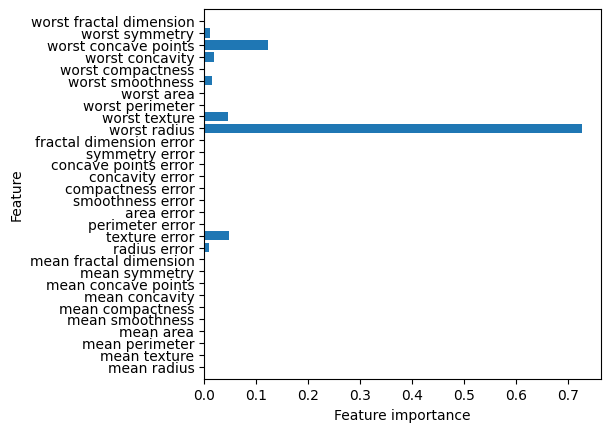

In [12]:
""" Decision Trees / Prunning (Breast Cancer)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree

# Dataset
df = load_breast_cancer()

# Training and test data
X1, X2, y1, y2 = train_test_split(
    df.data, df.target, stratify=df.target, random_state=42)

# Pre-prunning
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X1, y1)

# Predictions
X_new = X2[15]
y_pred = dtree.predict(X_new.reshape(1, -1))
y_pred_target = df['target_names'][y_pred]
score = dtree.score(X2, dtree.predict(X2))

# Get feature importances
importances = dtree.feature_importances_
impdf = pd.DataFrame({
    "Feature": df.feature_names, 
    "Importance": importances
})
impdf_sorted = impdf.sort_values(
    by="Importance", ascending=False
)
top_features = impdf_sorted["Feature"].head(5)

# Output
tree_text = tree.export_text(dtree)

outputs = [
    ["Featre names:", df['feature_names']],
    ["Dataset:", df['data']],
    ["Shape:", df['data'].shape],
    ["Target names:", df['target_names']],
    ["Malignant:", list(df['target_names']).index('malignant')],
    ["Decistion Tree:", tree_text],
    ["X_new:", X_new],
    ["Prediction:", y_pred],
    ["Prediction Target:", y_pred_target],
    ["Model accuracy score:", score],
    ["Top features:", top_features],
]
for out in outputs:
    print("\n", out[0], "\n ", out[1])

# Output graphics
print("\n Feature imporantance chart:")
n = df.data.shape[1]
plt.subplots_adjust(left=0.28)
plt.barh(np.arange(n), dtree.feature_importances_, align='center')
plt.yticks(np.arange(n), df.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n)
plt.show()